<a href="https://colab.research.google.com/github/mkadamgithubrit/Custom-Object-detection-in-images-using-YOLOV8/blob/main/Custom_Object_detection_in_images_using_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check the status of the NVIDIA GPU, useful for verifying GPU availability and monitoring its usage
!nvidia-smi

Thu Aug 29 10:13:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Get and print the current working directory
import os
home = os.getcwd()
print(home)

/content


In [ ]:
# Install the ultralytics library, which includes the YOLOv8 model for object detection
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 17.9 MB/s eta 0:00:00


In [ ]:
# Install a specific version (8.0.20) of the ultralytics library for compatibility or preference

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output
# Clear the output in the Google Colab notebook to make it cleaner and more readable
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)


In [ ]:
# Import the YOLO class from the ultralytics package
from ultralytics import YOLO
# Import the display and Image functions from IPython.display to show images in the notebook
from IPython.display import display, Image


## Detection with a Pre-trained Model

In [ ]:
# Perform object detection using a pre-trained YOLOv8 model (nano version) on a sample image of a bus
!yolo task=detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 106MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

## Custom Training

In [ ]:
# Mount Google Drive to the Colab environment to access datasets and save training results
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to the location of your custom YOLO dataset on Google Drive
%cd "/content/drive/MyDrive/Yolo Data/test"

/content/drive/MyDrive/Yolo Data/test


In [ ]:
# List the files in the current directory to verify that the dataset and configuration files are present
!ls

 bus.jpg				    data.yaml		  runs	 train	 yolov8n.pt
'Custom Object detection in images.ipynb'   README.roboflow.txt   test	 valid	 yolov8s.pt


In [ ]:
# Train a custom YOLOv8 model (small version) using your dataset, as defined in 'data.yaml', for 50 epochs
# 'imgsz=640' sets the input image size to 640 pixels, and 'plots=True' enables the plotting of training results

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=640 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

In [ ]:
# List the contents of the 'runs/detect/train/' directory to check for the output files generated during training
!ls runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1724738842.367cd4e59bc8.8007.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch405.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch406.jpg	   weights
R_curve.png					    train_batch407.jpg
results.csv					    val_batch0_labels.jpg


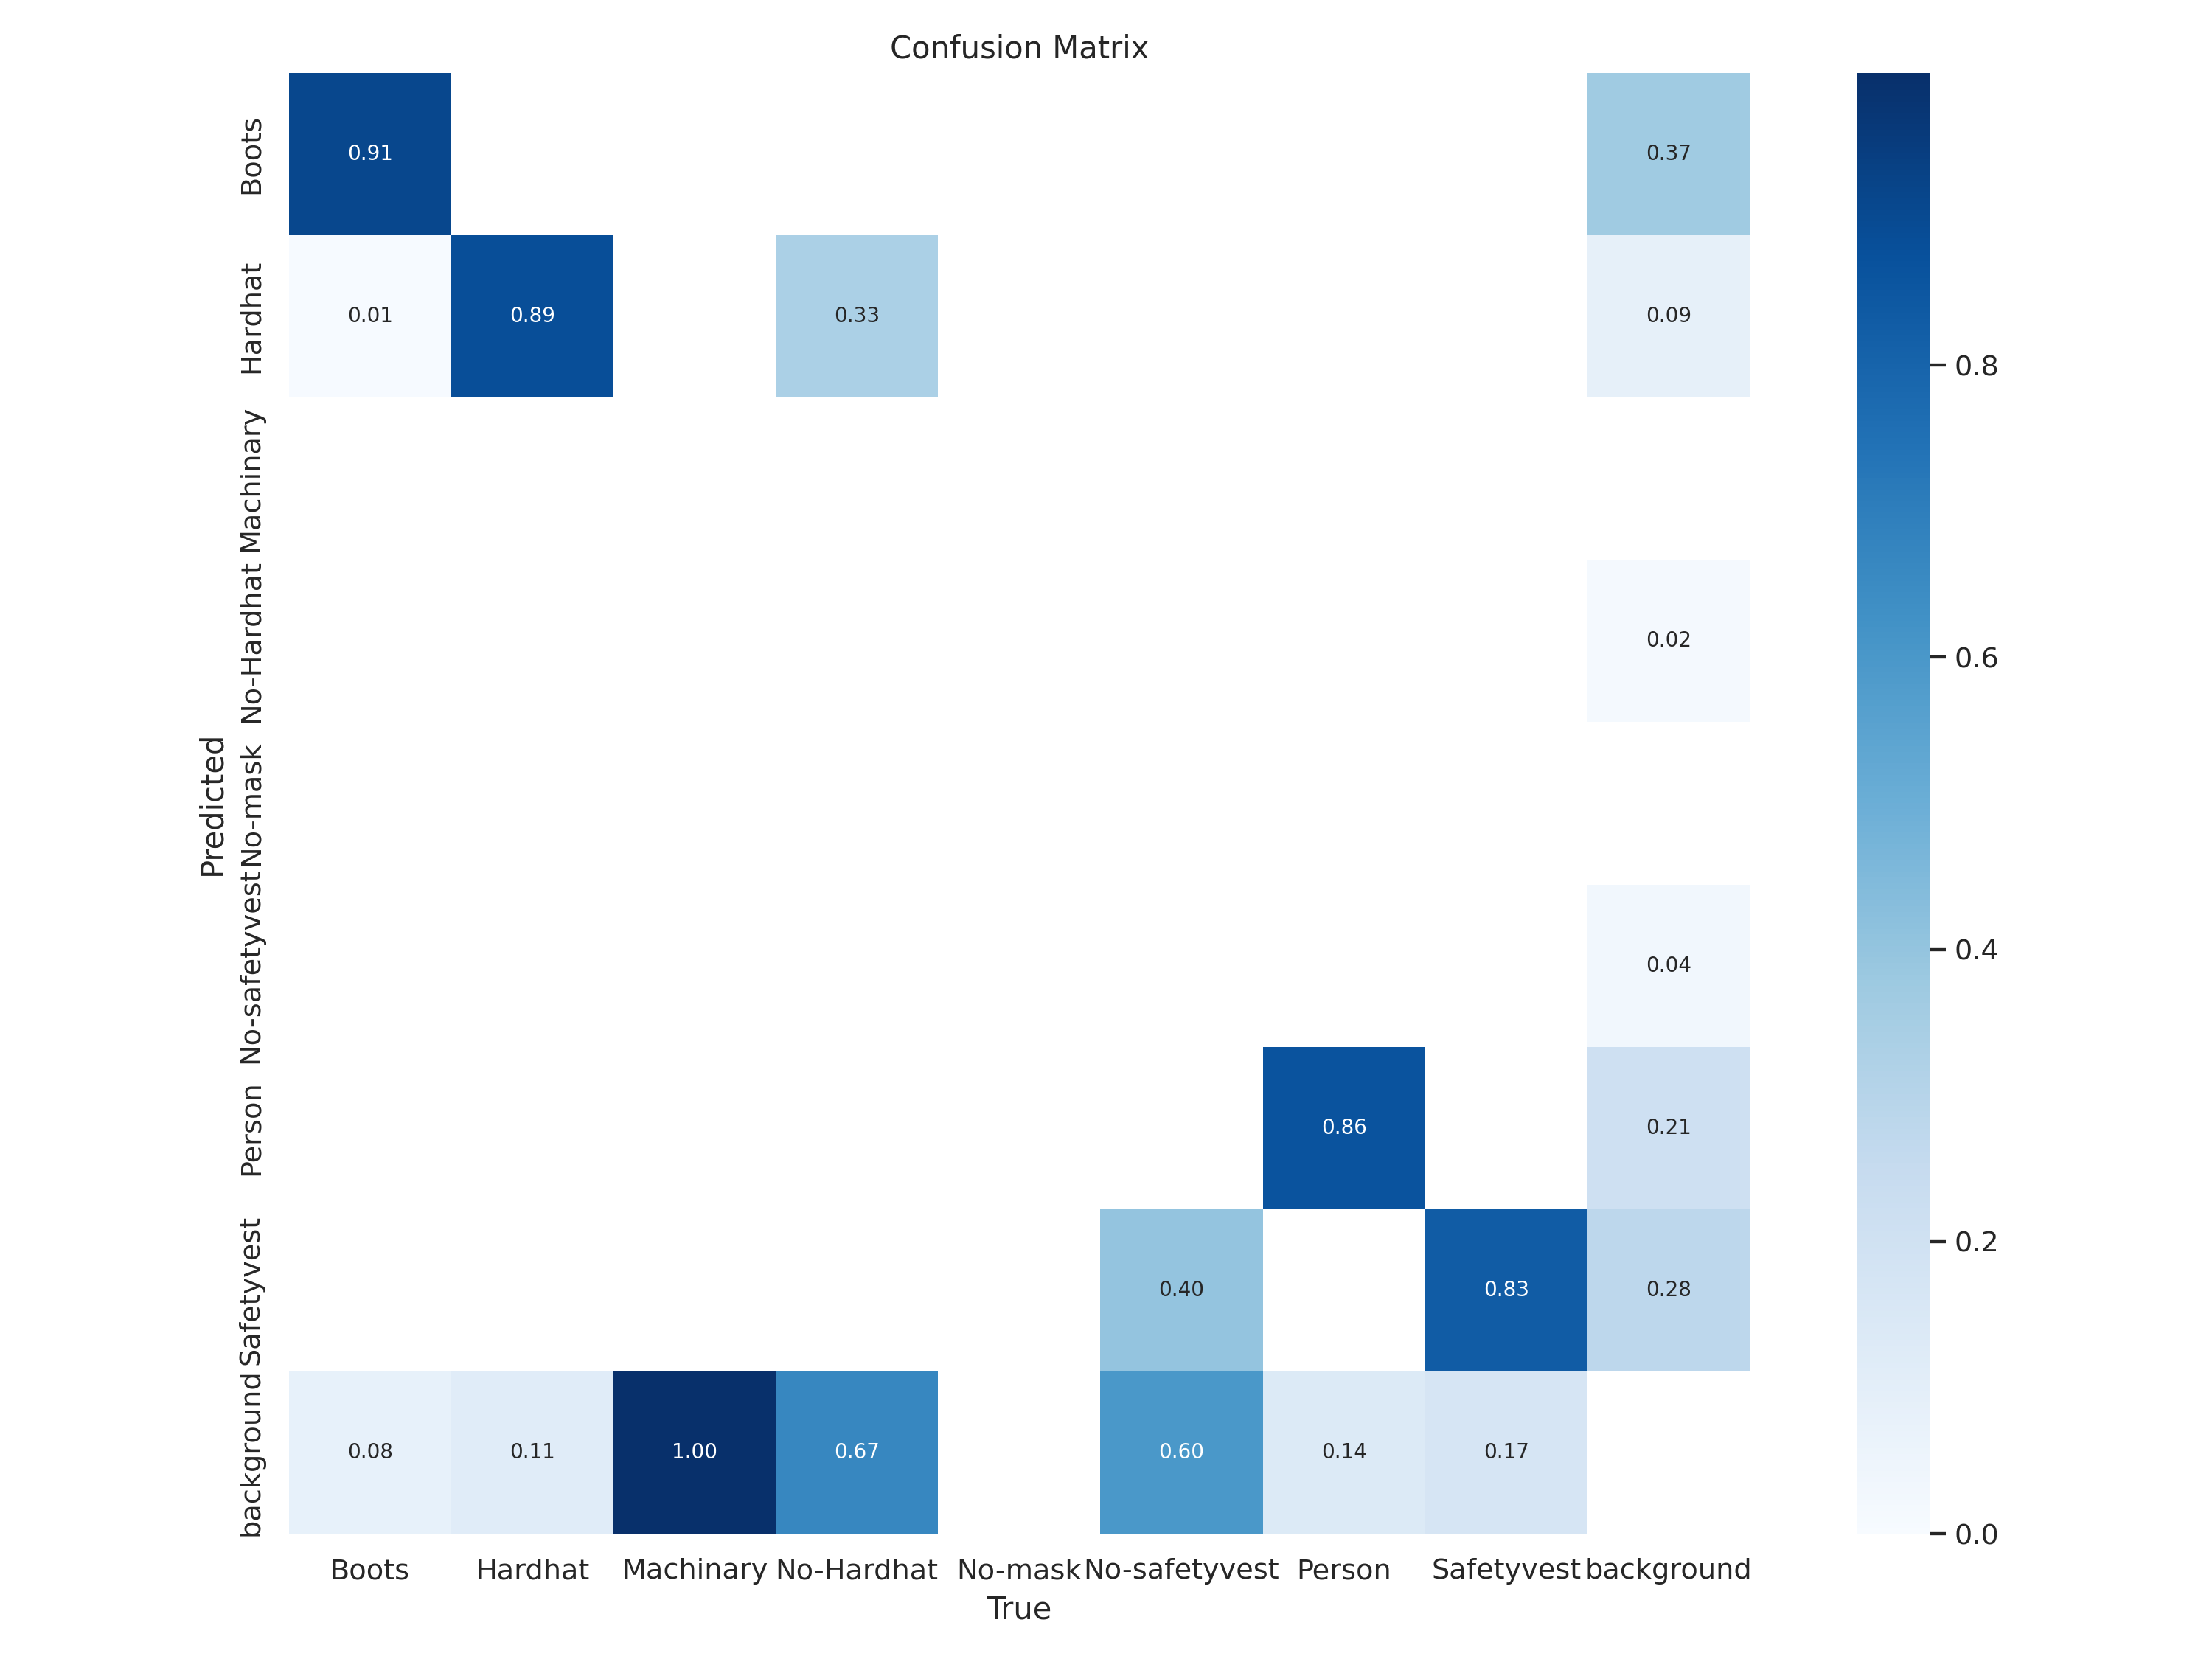

In [ ]:
# Display the confusion matrix image from the training results to assess model performance visually
Image(filename="runs/detect/train/confusion_matrix.png", width=600)

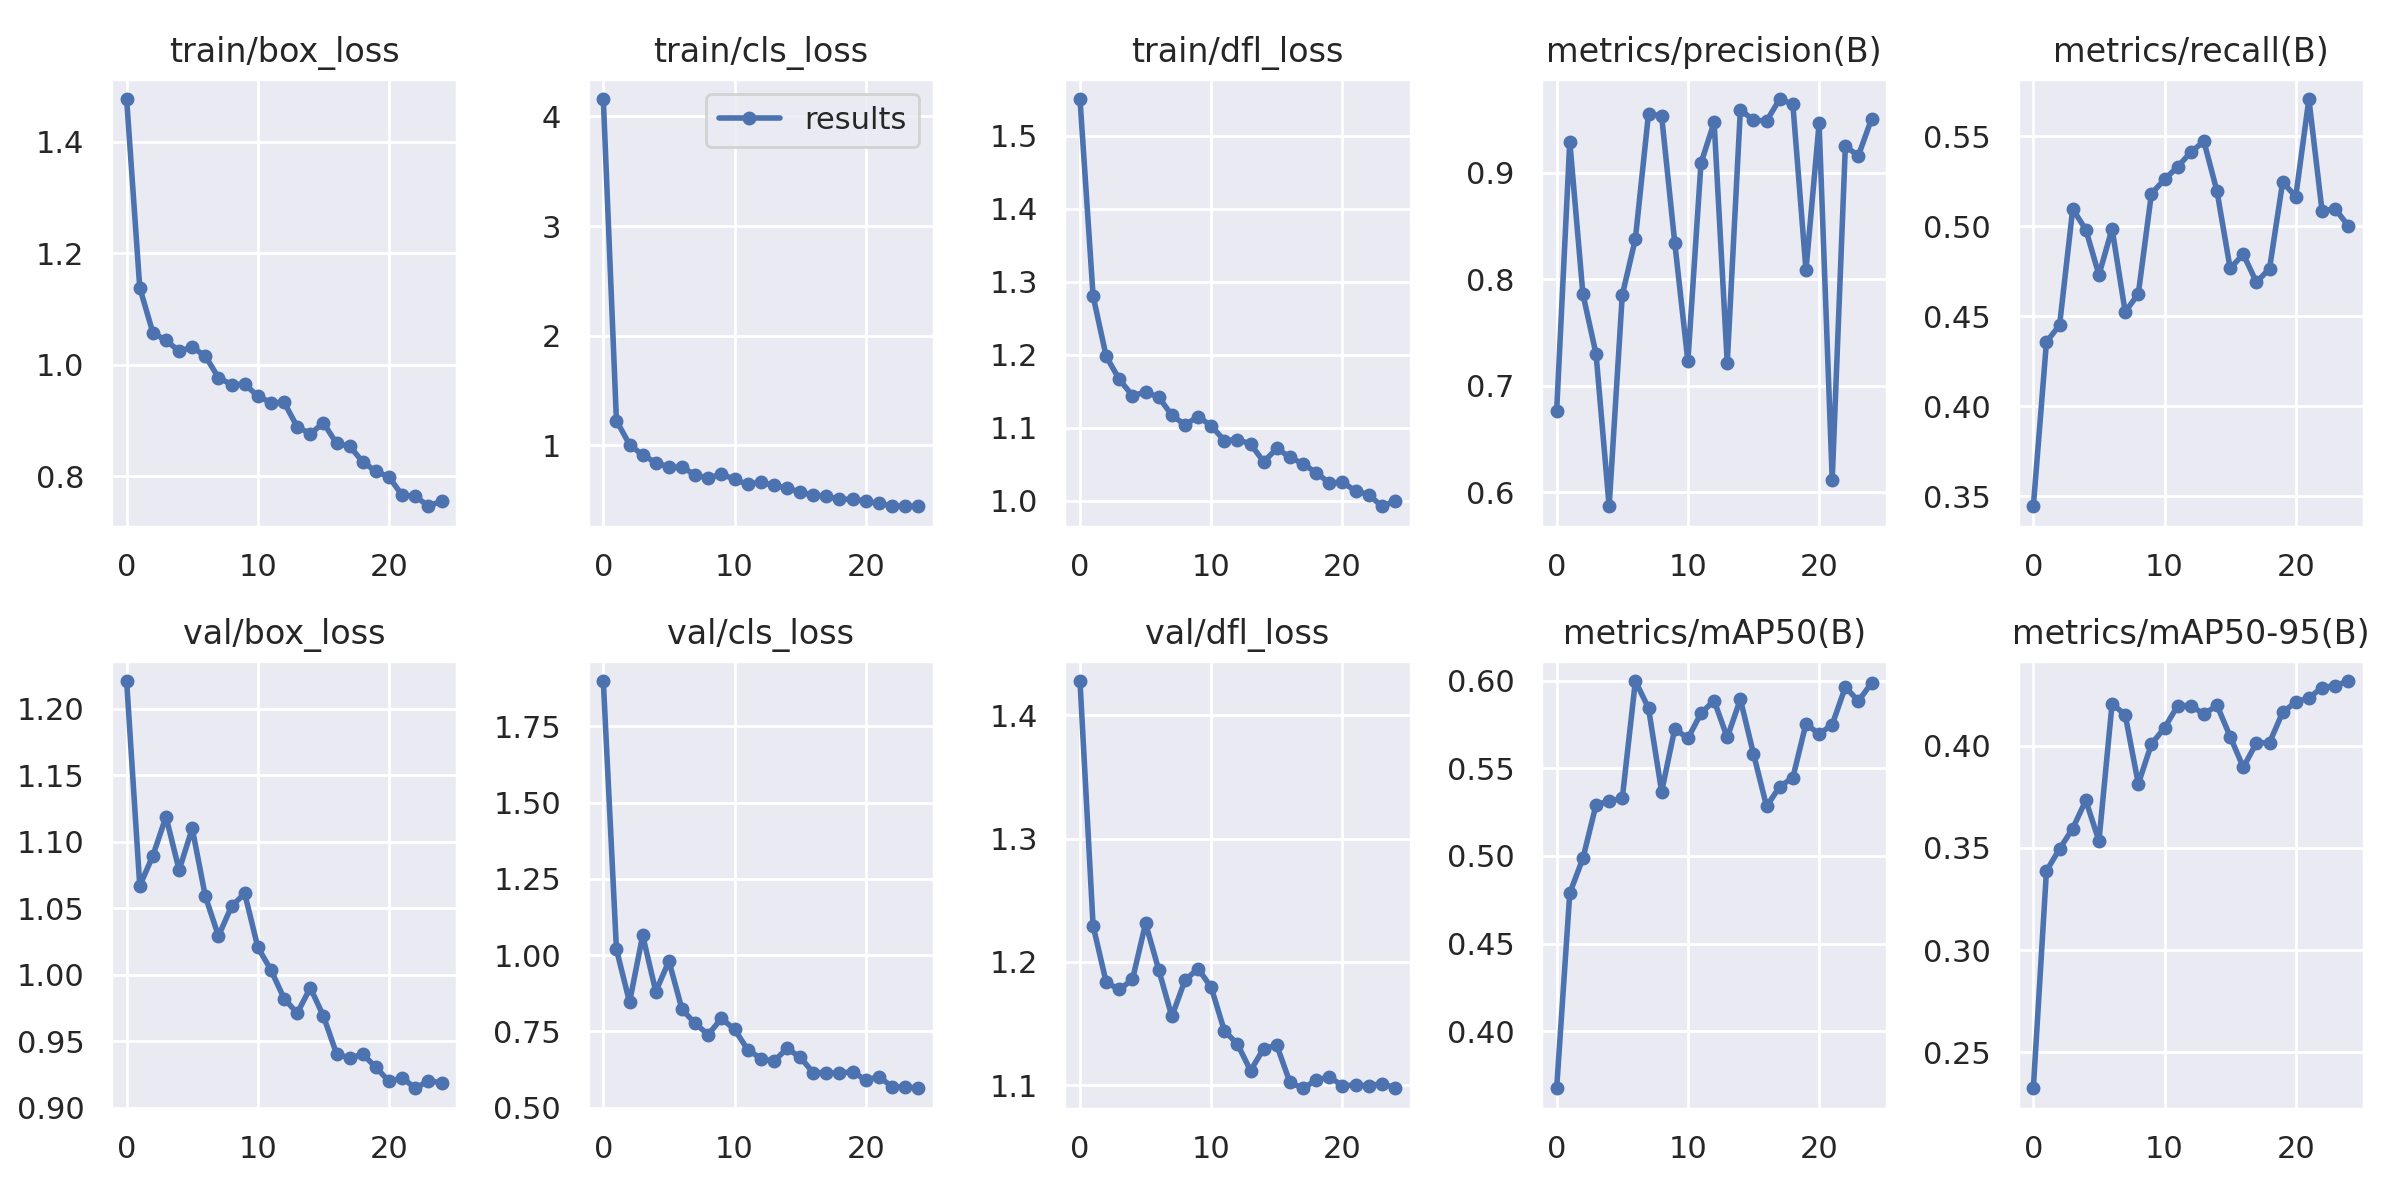

In [ ]:
# Display the results graph from the training to visualize the training metrics over the epochs
Image(filename="runs/detect/train/results.png", width=600)

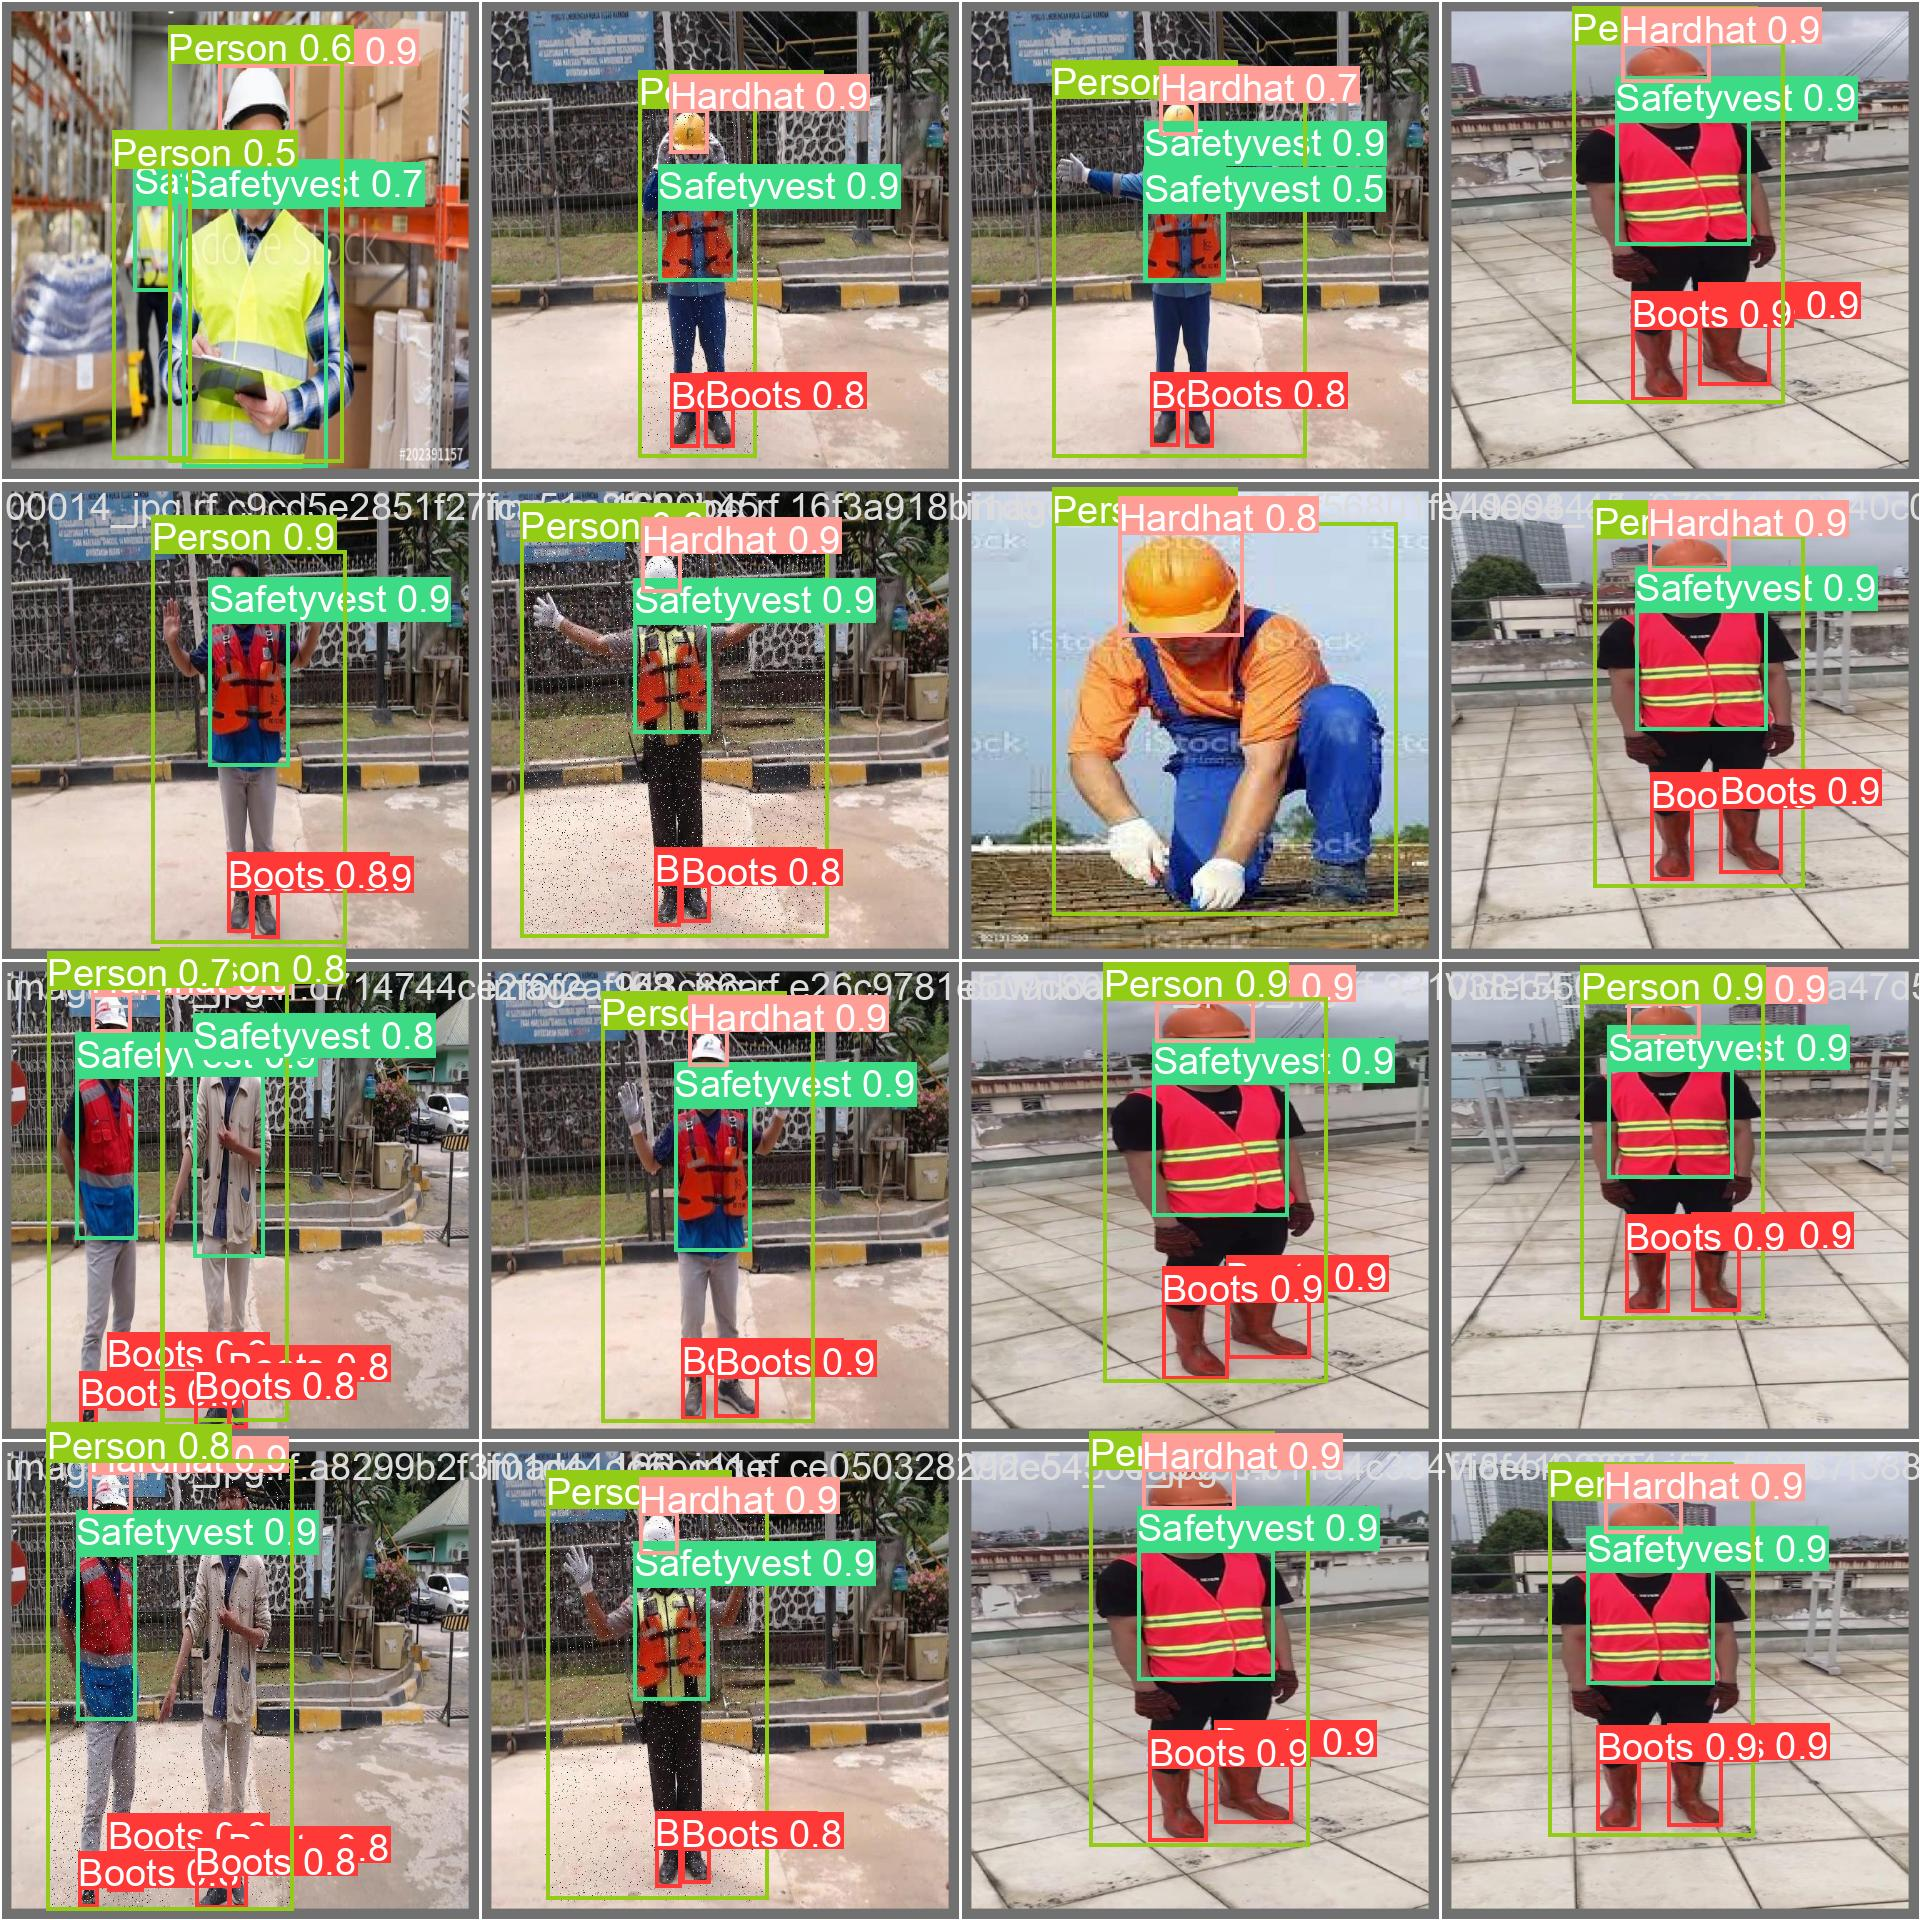

In [ ]:
# Display a sample of the model's predictions on validation data to evaluate the accuracy visually
Image(filename="runs/detect/train/val_batch0_pred.jpg", width=600)

## Validate Custom Model

In [ ]:
# Validate the performance of the custom-trained YOLO model on a validation dataset defined in 'data.yaml'
# This step helps assess how well the model generalizes to unseen data
!yolo task=detect mode=val model="/content/drive/MyDrive/Yolo Data/test/runs/detect/train/weights/best.pt" data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-0

## Inference with Custom Model

In [ ]:
# Use the custom-trained YOLO model to perform object detection on new test images
# The 'conf=0.2' parameter sets the confidence threshold for detections, allowing for lower-confidence detections
!yolo task=detect mode=predict model="/content/drive/MyDrive/Yolo Data/test/runs/detect/train/weights/best.pt" conf=0.2 source="/content/drive/MyDrive/Yolo Data/test/test/images"

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-0